## Master Data Frame

This notebook merges and cleans the three data sets used in this project, and builds a model for prediction. 

**Notebook Contents**

> 1. Read in raw CSV files formatted from other notebooks. Merge them on location.
> 2. Build OLS model, visualize.
> 3. Apply lasso, visualize.

In [396]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']


import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


Populating the interactive namespace from numpy and matplotlib


/Users/jhg/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['poly']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## 1. Read in CSVs, merge data

First, build the raw Master dataframe m_df.

In [660]:
sales_df = pd.read_csv('2016sales.csv', index_col=0)
crime_df = pd.read_csv('20142015crime.csv', index_col=0)
permit_df = pd.read_csv('20142015permit.csv', index_col=0)

,ADDRESS,ZIP CODE,TOTAL UNITS,SALE PRICE,DATE,Latitude,Longitude,Coords,SALE COUNT,OFNS_DESC,LAW_CAT_CD,FELONY,MISDEMEANOR,VIOLATION,A1,A2,A3,DM,NB,SG
0,EAST 29TH STREET,10016.0,0.0,0.0,2016-11-09,40.743,-73.980,"(-73.98, 40.743)",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,264 EAST 7TH STREET,10009.0,3.0,7738700.0,2016-12-22,40.723,-73.978,"(-73.978, 40.723)",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21 AVENUE B,10009.0,16.0,0.0,2016-03-10,40.722,-73.983,"(-73.983, 40.722)",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,615 EAST 6TH STREET,10009.0,10.0,6350000.0,2016-04-20,40.724,-73.981,"(-73.981, 40.724)",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,234 EAST 4TH STREET,10009.0,31.0,0.0,2016-12-14,40.723,-73.983,"(-73.983, 40.723)",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [717]:
permit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154980 entries, 5 to 3664552
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Latitude   154980 non-null  float64
 1   Longitude  154980 non-null  float64
 2   DATE       154980 non-null  object 
 3   A1         154980 non-null  int64  
 4   A2         154980 non-null  int64  
 5   A3         154980 non-null  int64  
 6   DM         154980 non-null  int64  
 7   NB         154980 non-null  int64  
 8   SG         154980 non-null  int64  
 9   Coords     154980 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 13.0+ MB


In [715]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225649 entries, 3018419 to 7309635
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   OFNS_DESC    225649 non-null  object 
 1   LAW_CAT_CD   225649 non-null  object 
 2   Latitude     225649 non-null  float64
 3   Longitude    225649 non-null  float64
 4   DATE         225649 non-null  object 
 5   Coords       225649 non-null  object 
 6   FELONY       225649 non-null  int64  
 7   MISDEMEANOR  225649 non-null  int64  
 8   VIOLATION    225649 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 17.2+ MB


In [716]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20460 entries, 0 to 20485
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ADDRESS      20460 non-null  object 
 1   ZIP CODE     20460 non-null  float64
 2   TOTAL UNITS  20460 non-null  float64
 3   SALE PRICE   20460 non-null  float64
 4   DATE         20460 non-null  object 
 5   Latitude     20460 non-null  float64
 6   Longitude    20460 non-null  float64
 7   Coords       20460 non-null  object 
 8   SALE COUNT   20460 non-null  int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 1.6+ MB


In [718]:
m_df = pd.DataFrame()
m_df = sales_df.append(crime_df, ignore_index = True).append(permit_df, ignore_index = True)
m_df['DATE'] = pd.to_datetime(m_df['DATE'])
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401089 entries, 0 to 401088
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ADDRESS      20460 non-null   object        
 1   ZIP CODE     20460 non-null   float64       
 2   TOTAL UNITS  20460 non-null   float64       
 3   SALE PRICE   20460 non-null   float64       
 4   DATE         401089 non-null  datetime64[ns]
 5   Latitude     401089 non-null  float64       
 6   Longitude    401089 non-null  float64       
 7   Coords       401089 non-null  object        
 8   SALE COUNT   20460 non-null   float64       
 9   OFNS_DESC    225649 non-null  object        
 10  LAW_CAT_CD   225649 non-null  object        
 11  FELONY       225649 non-null  float64       
 12  MISDEMEANOR  225649 non-null  float64       
 13  VIOLATION    225649 non-null  float64       
 14  A1           154980 non-null  float64       
 15  A2           154980 non-null  floa

In [722]:
len(m_df.Coords.unique())

4841

In [723]:
m_df.fillna(0,inplace=True)

The long/lat values are zipped into a new column so the values will be preserved when the dataframe is grouped and summed around the coordinates. 

The rounding value in the cell below seperates the large data (3) set from the small one (2). Everything that follows it run twice, once for each set. 

The values can then be unpacked after the groupby operation if needed for mapping. 

In [850]:
m_df['Coords'] = list(zip(m_df.Longitude.round(2), m_df.Latitude.round(2)))

A new dataframe is created to perform the aggregation by coordinates. 

In [851]:
g_rnd_df = pd.DataFrame()
g_rnd_df = m_df.groupby('Coords').sum()
g_rnd_df = g_rnd_df.reset_index()
g_rnd_df['Latitude'], g_rnd_df['Longitude'] = zip(*g_rnd_df.Coords)
g_rnd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Coords       109 non-null    object 
 1   ZIP CODE     109 non-null    float64
 2   TOTAL UNITS  109 non-null    float64
 3   SALE PRICE   109 non-null    float64
 4   Latitude     109 non-null    float64
 5   Longitude    109 non-null    float64
 6   SALE COUNT   109 non-null    float64
 7   FELONY       109 non-null    float64
 8   MISDEMEANOR  109 non-null    float64
 9   VIOLATION    109 non-null    float64
 10  A1           109 non-null    float64
 11  A2           109 non-null    float64
 12  A3           109 non-null    float64
 13  DM           109 non-null    float64
 14  NB           109 non-null    float64
 15  SG           109 non-null    float64
dtypes: float64(15), object(1)
memory usage: 13.8+ KB


In [852]:
g_rnd_df.drop(['ZIP CODE','Latitude','Longitude','TOTAL UNITS'],axis=1, inplace=True)

In [840]:
mask = (g_rnd_df['SALE PRICE'] < 200000)
g_rnd_df = g_rnd_df.mask(mask).copy()
g_rnd_df.dropna(inplace = True)
g_rnd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2419 entries, 3 to 4825
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Coords       2419 non-null   object 
 1   SALE PRICE   2419 non-null   float64
 2   SALE COUNT   2419 non-null   float64
 3   FELONY       2419 non-null   float64
 4   MISDEMEANOR  2419 non-null   float64
 5   VIOLATION    2419 non-null   float64
 6   A1           2419 non-null   float64
 7   A2           2419 non-null   float64
 8   A3           2419 non-null   float64
 9   DM           2419 non-null   float64
 10  NB           2419 non-null   float64
 11  SG           2419 non-null   float64
dtypes: float64(11), object(1)
memory usage: 245.7+ KB


## 2. Build OLS model, visualize

Histogram of target variables, correlation heatmap, and pairplot made prior to model to get some inight on potential issues with skew/lack of correlation.

This notebook ends up being ran twice with two different data sets, as mentioned above. During the feature engineering process, the smaller data set appeared to be getting better results as the 'alteration' categorical types were joined into a single value, while the larger data set performed better without. This was manually updated as the notebook was run each time. 

In both cases, the 'other' category as part of the permit data set was dropped from the model, and the crime data and target variables were log transformed.

Throughout this process both 'sale count' and 'sale price' were weighed as potential target variables. The R^2 value was so low during the majority of the feature engineering process that almost everything was 'on the table'. I felt as though the count of sales could be just as good as a target to have when considering a 'volume' of sales activity. Ultimately, sale price was used. 

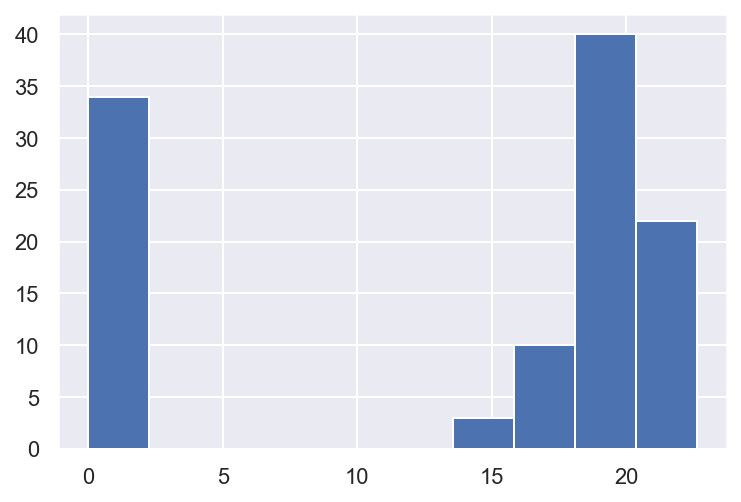

In [861]:
g_rnd_df['log_sale_price'].hist()

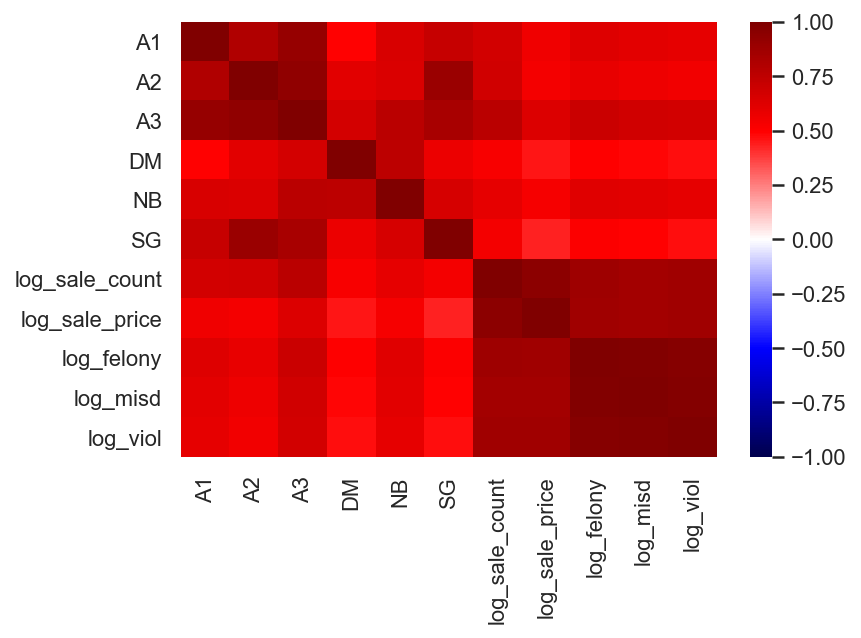

In [855]:
sns.heatmap(g_rnd_df.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1)

In [853]:
g_rnd_df['log_sale_count'] = np.log(g_rnd_df['SALE COUNT']+1)
g_rnd_df['log_sale_price'] = np.log(g_rnd_df['SALE PRICE']+1)
g_rnd_df['log_felony'] = np.log(g_rnd_df['FELONY']+1)
g_rnd_df['log_misd'] = np.log(g_rnd_df['MISDEMEANOR']+1)
g_rnd_df['log_viol'] = np.log(g_rnd_df['VIOLATION']+1)

In [854]:
g_rnd_df.drop(['SALE COUNT','SALE PRICE','FELONY','MISDEMEANOR','VIOLATION'],axis=1, inplace=True)

**The cell below, is only run for the smaller of the two data sets.**

In [ ]:
g_rnd_df['alts'] = g_rnd_df['A1'] + g_rnd_df['A2'] + g_rnd_df['A3']
g_rnd_df.drop(['A1','A2','A3'],axis=1,inplace=True)

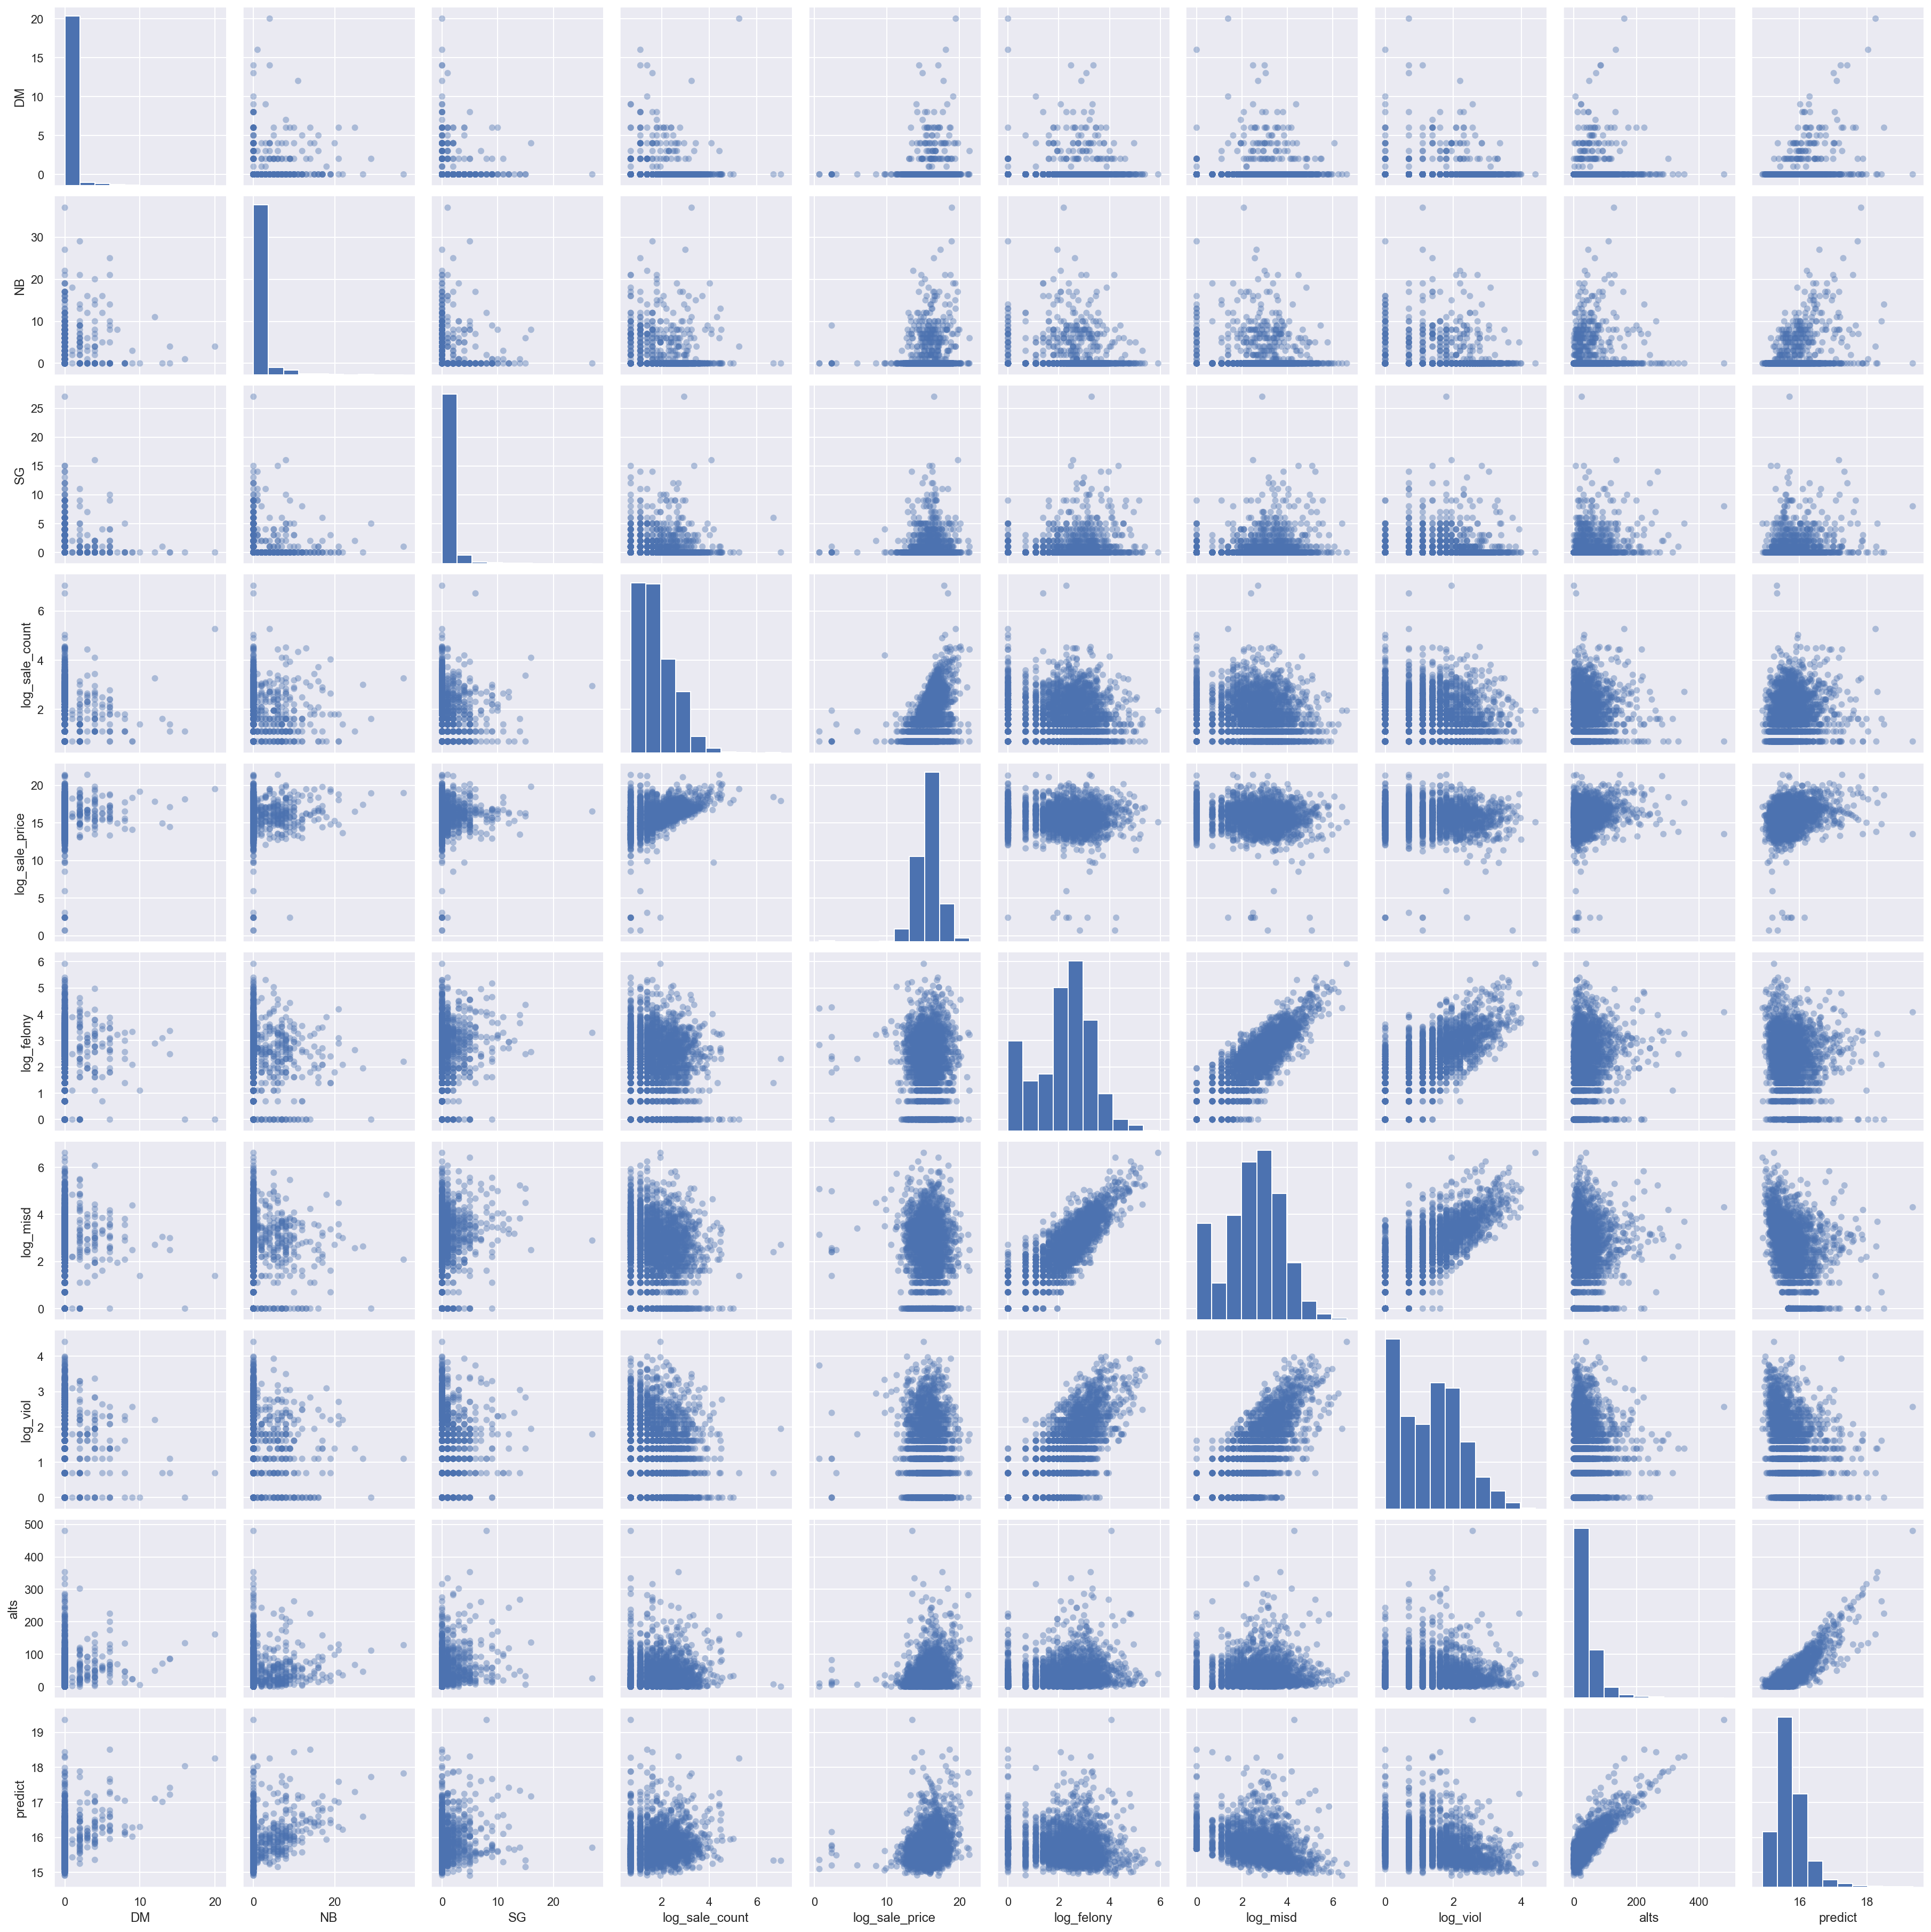

In [792]:
sns.pairplot(g_rnd_df, plot_kws=dict(alpha=.4, edgecolor='none'))

In [677]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

In [866]:
#MISDEMEANOR + VIOLATION + FELONY + SG + A3 + A2 + A1 + NB + DM
y, X = patsy.dmatrices('log_sale_price ~ log_felony + + log_misd + log_viol + alts + NB + DM', data=g_rnd_df, return_type="dataframe")
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_sale_price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     62.55
Date:                Fri, 17 Jul 2020   Prob (F-statistic):           5.69e-32
Time:                        10:07:20   Log-Likelihood:                -311.80
No. Observations:                 109   AIC:                             637.6
Df Residuals:                     102   BIC:                             656.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7571      1.049      1.674      0.097      -0.324       3.839
log_felony     3.8103      1.115      3.418      0.001       1.599       6.022
log_misd      -3.0299      1.186     -2.555      0.012      -5.382      -0.678
log_viol       2.4555      0.820      2.995      0.003       0.830       4.081
alts           0.0002      0.000      0.542      0.589      -0.000       0.001
NB            -0.0094      0.016     -0.584      0.560      -0.041       0.023
DM             0.0254      0.042      0.599      0.550      -0.059       0.109
==============================================================================
Omnibus:                        9.408   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               21.356
Skew:                           0.100   Prob(JB):                     2.30e-05
Kurtosis:                       5.159   Cond. No.                     9.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

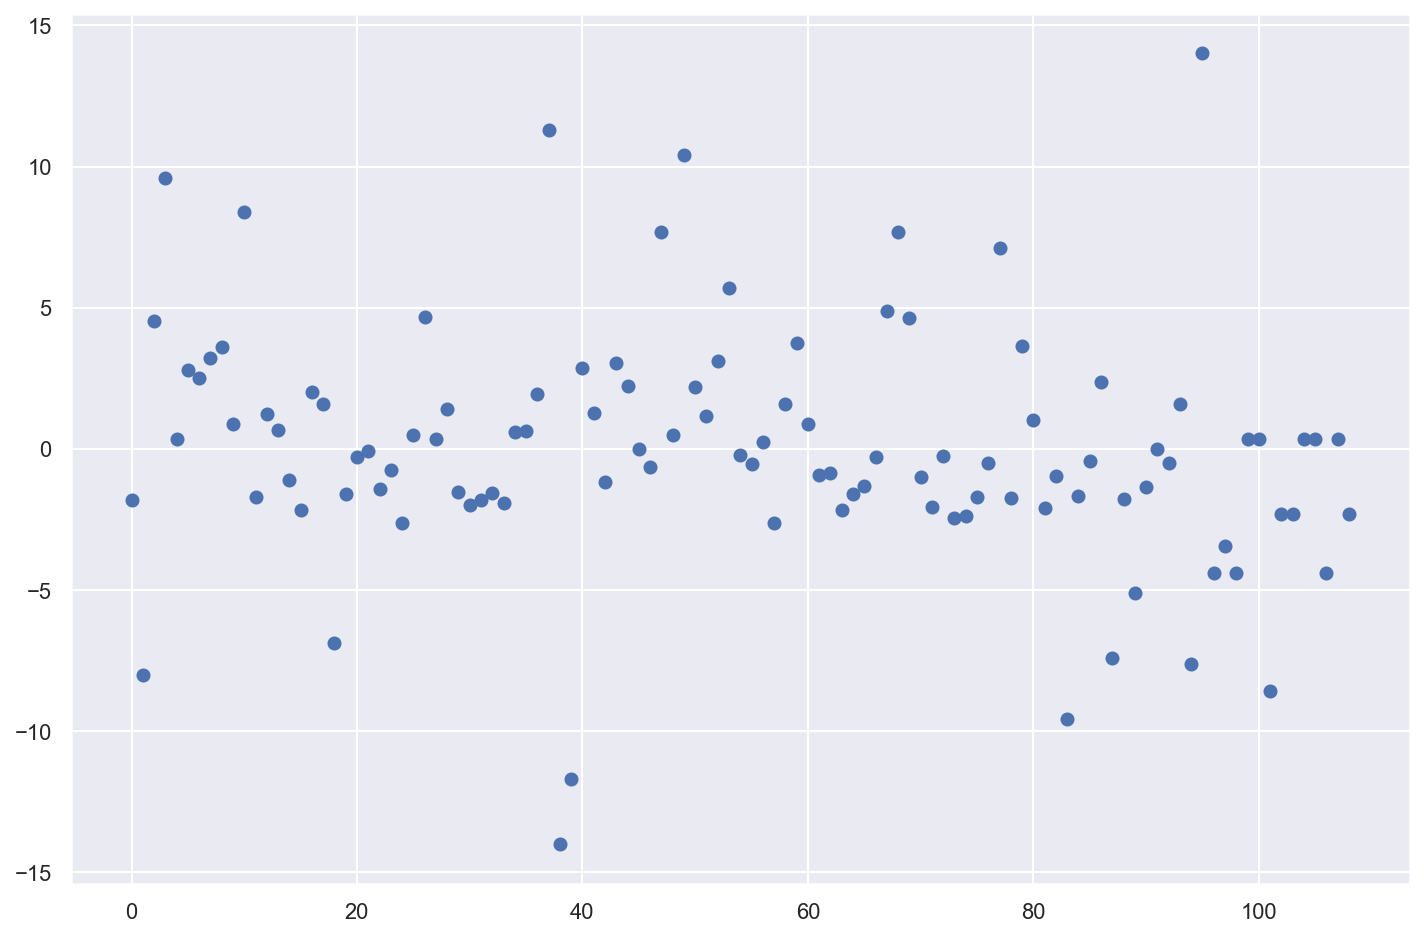

In [859]:
fit.resid.plot(style='o', figsize=(12,8));

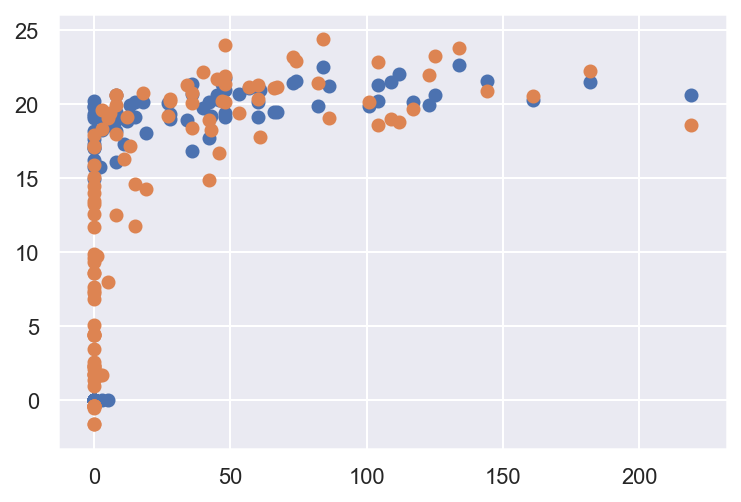

In [869]:
g_rnd_df['predict'] = fit.predict(X)
plt.scatter(g_rnd_df.NB,y)
plt.scatter(g_rnd_df.NB,g_rnd_df.predict)

## 3. Lasso Model

I began splitting the data on 60/20/20 train/val/test for the small data set... but ultimately to visualize the model, I used the whole data set as the values were so small. 


In [880]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

In [872]:
#Separate our features from our target

X = g_rnd_df.loc[:,['log_felony', 'log_misd','log_viol', 'alts', 'NB', 'DM']]

y = g_rnd_df['log_sale_price']

In [873]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [874]:
X_train.columns

Index(['log_felony', 'log_misd', 'log_viol', 'alts', 'NB', 'DM'], dtype='object')

In [875]:
X_train.shape

(65, 6)

In [876]:
X_val.shape

(22, 6)

In [877]:
X_test.shape

(22, 6)

In [878]:
selected_columns = ['log_felony', 'log_misd','log_viol', 'alts', 'NB', 'DM']

In [911]:
lasso_model = Lasso(alpha = 3)
lasso_model.fit(X_train.loc[:,selected_columns], y_train)

Lasso(alpha=3, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [912]:
list(zip(selected_columns, lasso_model.coef_))

[('log_felony', 0.851012203561242),
 ('log_misd', 1.0351763490716688),
 ('log_viol', 0.14720512243877493),
 ('alts', 0.0013044369675005248),
 ('NB', 0.002272149881158329),
 ('DM', -0.0)]

In [903]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_sale_price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     38.63
Date:                Fri, 17 Jul 2020   Prob (F-statistic):           1.66e-18
Time:                        12:52:54   Log-Likelihood:                -184.85
No. Observations:                  65   AIC:                             383.7
Df Residuals:                      58   BIC:                             398.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5961      1.397      0.427      0.671      -2.200       3.393
log_felony     2.5452      1.392      1.828      0.073      -0.242       5.332
log_misd      -1.3176      1.732     -0.761      0.450      -4.784       2.149
log_viol       1.8889      1.079      1.751      0.085      -0.271       4.048
alts           0.0005      0.001      0.888      0.378      -0.001       0.002
NB            -0.0079      0.021     -0.383      0.703      -0.049       0.034
DM             0.0152      0.052      0.291      0.772      -0.089       0.120
==============================================================================
Omnibus:                        4.833   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                6.248
Skew:                           0.067   Prob(JB):                       0.0440
Kurtosis:                       4.513   Cond. No.                     9.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [913]:
test_set_pred = lasso_model.predict(X.loc[:,selected_columns])

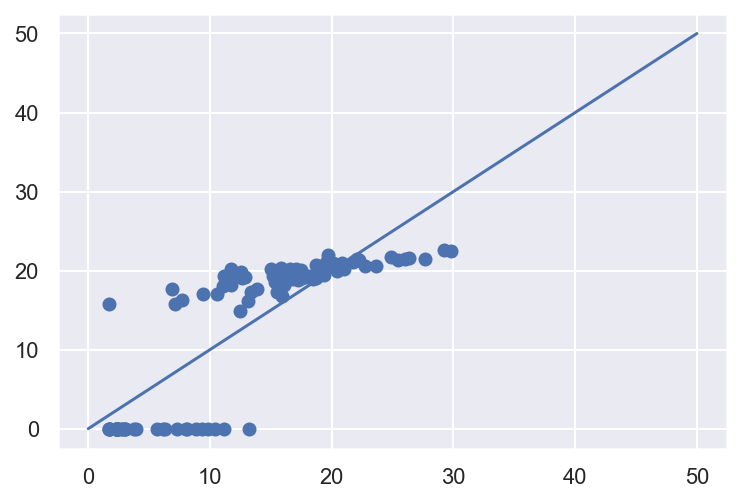

In [914]:
plt.scatter(test_set_pred, y, alpha=1)
plt.plot(np.linspace(0,50,1000), np.linspace(0,50,1000))

In [899]:
r2_score(y, test_set_pred)

0.7638122358165015

In [900]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y, test_set_pred)

3.075782270405365

**Everything below this point is sketch/unfinished work.**

In [821]:
from scipy.stats import boxcox

y_t, _lambda = boxcox(g_rnd_df.log_sale_count)

_lambda

0.24351707058521632

In [826]:
import scipy

In [827]:

scipy.stats.boxcox(x, lmbda=None, alpha=None)[source]

NameError: name 'x' is not defined

Lambda: 0.47614313705287487


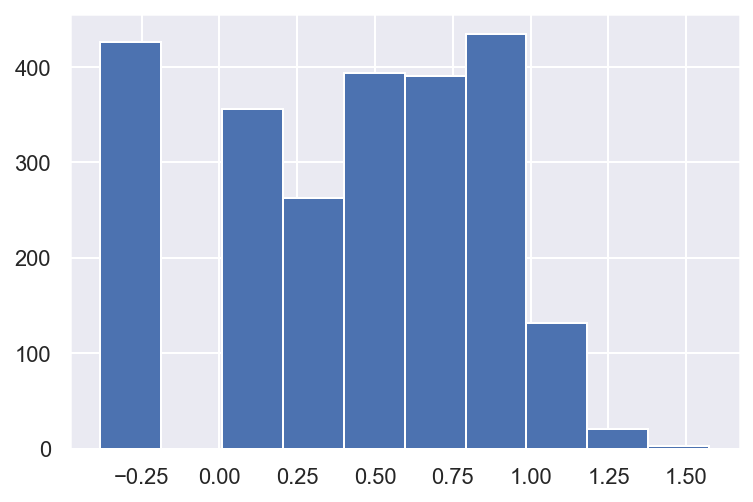

In [829]:
lamb=stats.boxcox_normmax(g_rnd_df.log_sale_count, brack=(-1.9, 1.9)) # don't use "lambda" as it's a Python reserved word
print("Lambda:", lamb)
y_t=(np.power(g_rnd_df.log_sale_count,-0.2282)-1)/-0.2282

plt.hist(y_t);

In [675]:
#'OFNS_DESC','LAW_CAT_CD','ADDRESS','DATE',
X = g_rnd_df.drop(['SALE COUNT','DM','SALE PRICE','Coords','TOTAL UNITS','MISDEMEANOR','VIOLATION','SG','FELONY','A3','A2','A1','NB'],axis=1)

y = g_rnd_df['SALE COUNT']

In [540]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
        

In [867]:
split_and_validate(X, y)


Validation R^2 score was: 0.869112334303638
Feature coefficient results: 



TypeError: unsupported format string passed to numpy.ndarray.__format__

In [697]:
g_rnd_df['T_Crime'] = (g_rnd_df['VIOLATION']) + (g_rnd_df['FELONY']) + (g_rnd_df['MISDEMEANOR'])
g_rnd_df['Alterations'] = (g_rnd_df['A1']) + (g_rnd_df['A2']) + (g_rnd_df['A3'])

In [ ]:
sns.lmplot(x="x", y="y", ci=None, col="dataset", data=anscombe.query("dataset=='I'"))

In [331]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [353]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=100)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [354]:
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: -3.117
Ridge Regression val R^2: 0.762
Degree 2 polynomial regression val R^2: -813971.161
